In [4]:
import pandas as pd
df=pd.read_csv("Week7_train.csv")

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df.shape


(42000, 785)

In [8]:
df.shape[0]

42000

In [9]:
from sklearn.model_selection import train_test_split
df_experiment, df_remaining = train_test_split(df, test_size=0.90, random_state=42)
print(df_experiment.shape)  


(4200, 785)


In [8]:
df_experiment.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9867,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27923,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41720,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35503,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21372,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
num_classes = df["label"].nunique()
print(num_classes)

10


In [11]:

unique_classes = np.unique(df["label"])
num_classes = len(unique_classes)
print(f"Unique classes: {unique_classes}")
print(f"Number of unique classes: {num_classes}")


Unique classes: [0 1 2 3 4 5 6 7 8 9]
Number of unique classes: 10


In [12]:
sum=0
for i in range(0,10):
    count=0
    for j in range(0,df_experiment.shape[0]):
        if df.label[j]==i:
            count+=1  
    print(i,count)
    sum+=count
print(sum)

0 425
1 460
2 454
3 386
4 409
5 398
6 436
7 427
8 404
9 401
4200


In [13]:
X=df_experiment.drop(columns="label")
y=df_experiment["label"]


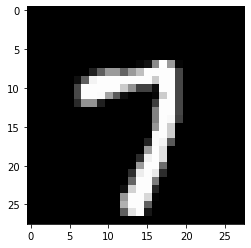

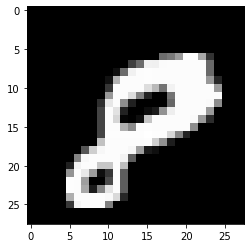

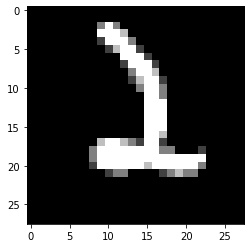

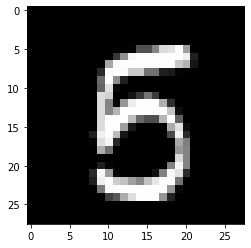

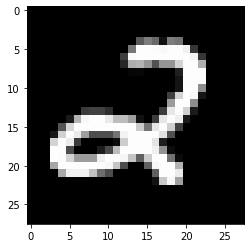

In [15]:
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray") 
    #plt.title(f"Label: {y.iloc[i]}")
    plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_test.shape, y_test.shape)


Training set shape: (3150, 784) (3150,)
Validation set shape: (1050, 784) (1050,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
print("KNN model trained successfully!")


KNN model trained successfully!


In [19]:

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
print("KNN model trained with default parameters!")


KNN model trained with default parameters!


In [20]:
y_pred=knn.predict(X_test)
y_pred

array([5, 2, 7, ..., 0, 5, 9])

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[100   0   0   0   0   1   0   0   0   0]
 [  0 118   1   0   0   0   0   0   1   0]
 [  1   1  86   1   0   0   0   3   0   0]
 [  0   1   1  98   0   4   0   1   1   2]
 [  0   4   0   0  77   0   1   1   0   6]
 [  2   1   0   3   1  85   4   0   1   0]
 [  0   1   0   0   0   0 112   0   0   0]
 [  0   4   0   0   0   0   0 105   0   1]
 [  1   1   1   3   1   3   4   1  77   1]
 [  1   0   0   2   2   0   0   9   0 113]]


In [54]:
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       101
           1       0.90      0.98      0.94       120
           2       0.97      0.93      0.95        92
           3       0.92      0.91      0.91       108
           4       0.95      0.87      0.91        89
           5       0.91      0.88      0.89        97
           6       0.93      0.99      0.96       113
           7       0.88      0.95      0.91       110
           8       0.96      0.83      0.89        93
           9       0.92      0.89      0.90       127

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.92      1050
weighted avg       0.93      0.92      0.92      1050

Accuracy: 0.9247619047619048


In [60]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Adjust reshape size based on dataset
    plt.title(f"Predicted Label: {y_pred[i]}")
    plt.show()


KeyError: 0

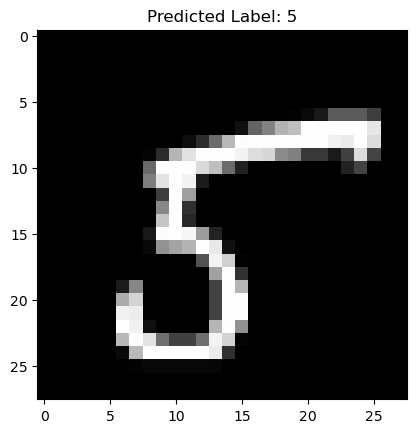

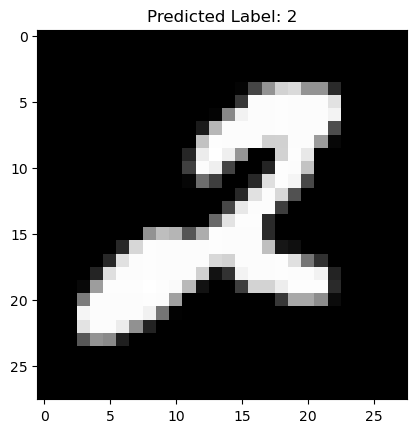

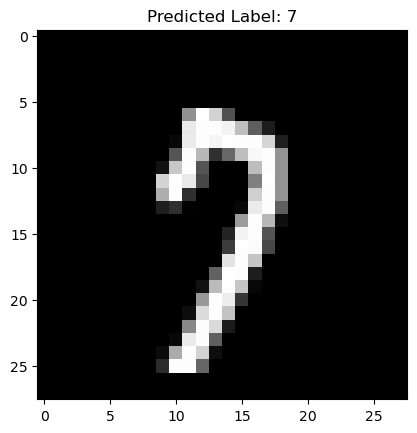

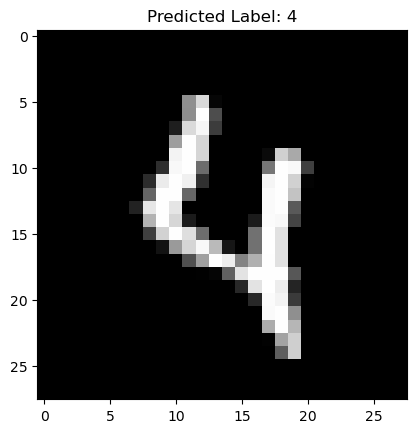

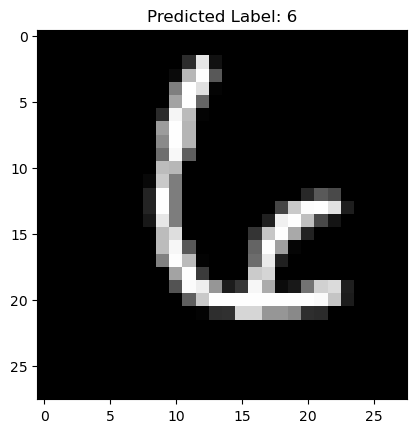

In [61]:
 import matplotlib.pyplot as plt

# Convert DataFrame to NumPy array
X_test_array = X_test.to_numpy()

for i in range(5):
    plt.imshow(X_test_array[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {y_pred[i]}")
    plt.show()

